In [20]:
import sys
sys.path.append('/home/peng/git/Machine_learning_for_reliability_analysis/Preprocess')
sys.path.append('/home/peng/git/Machine_learning_for_reliability_analysis/DAlgorithms')

import Preprocessdata
import MySVM as mysvc

In [21]:
from __future__ import print_function
from __future__ import division

import logging
from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC

from bayes_opt import BayesianOptimization
from pandas.core.frame import DataFrame
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics.classification import accuracy_score, confusion_matrix, classification_report
from scipy.interpolate import spline
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.gaussian_process import GaussianProcess
import timeit
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy.interpolate import spline
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
import re
from astropy.io.fits.header import Header
from matplotlib.pyplot import xlim
from sklearn import svm
%matplotlib inline


In [22]:

# Load data set and target values
start = timeit.default_timer()

####### Read the source data######################
df =pd.read_csv('Source_Data.csv', header=0)


p= Preprocessdata.standardprocess()

save_path = '/home/peng/git/Machine_learning_for_reliability_analysis/Kernel/Results/'
result_name = 'j1_rbf_pca_train_v1.csv'

seed = 'rbf'
rad_stat = 2

#train, trainlabel, test, testlabel = p.scaledivd(df, 0.8)
#print (np.shape(train))

In [23]:
#### scale the training dataset first and then apply the rules to test set 
train, trainlabel, test, testlabel = p.sep_scale_divd(df, 0.8)
#print (test[0:10])


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 6  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(12,))
# "encoded" is the encoded representation of the input
encoded = Dense(6, activation='relu')(input_img)
encoded = Dense(6, activation='relu')(encoded)

decoded = Dense(12, activation='relu')(encoded)

encoder = Model(input=input_img, output=encoded)
# this model maps an input to its reconstruction

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(train, train,
                nb_epoch=1000,
                batch_size=128,
                shuffle=True
                )
train_new = autoencoder.predict(train)
print(np.shape(train_new))
test_new = autoencoder.predict(test)
print(np.shape(test_new))

Epoch 1/1000
128/128 [==============================] - 0s - loss: 2.6485
Epoch 2/1000
128/128 [==============================] - 0s - loss: 2.6408
Epoch 3/1000
128/128 [==============================] - 0s - loss: 2.6309
Epoch 4/1000
128/128 [==============================] - 0s - loss: 2.6168
Epoch 5/1000
128/128 [==============================] - 0s - loss: 2.6017
Epoch 6/1000
128/128 [==============================] - 0s - loss: 2.5949
Epoch 7/1000
128/128 [==============================] - 0s - loss: 2.5889
Epoch 8/1000
128/128 [==============================] - 0s - loss: 2.5820
Epoch 9/1000
128/128 [==============================] - 0s - loss: 2.5727
Epoch 10/1000
128/128 [==============================] - 0s - loss: 2.5701
Epoch 11/1000
128/128 [==============================] - 0s - loss: 2.5674
Epoch 12/1000
128/128 [==============================] - 0s - loss: 2.5626
Epoch 13/1000
128/128 [==============================] - 0s - loss: 2.5601
Epoch 14/1000
128/128 [===========

In [25]:
train_1 = encoder.predict(train)
test_1 = encoder.predict(test)


In [26]:
# use the new features to train

ff = mysvc.training_manCV()

df_1 = ff.trainauc(train_1, trainlabel, 'rbf', Cmin=-10, Cmax=10, numC=21, rmin=-10, rmax=10, numr=21, degree = 3,
                rad_stat = rad_stat)

#df_1.to_csv(save_path + 'j1_rbf_encoding_1_train_auc_1.csv', header = True)


0.755366591081
1 cycle finished, 20 left
0.755300453515
2 cycle finished, 19 left
0.755300453515
3 cycle finished, 18 left
0.755300453515
4 cycle finished, 17 left
0.755366591081
5 cycle finished, 16 left
0.755366591081
6 cycle finished, 15 left
0.755366591081
7 cycle finished, 14 left
0.755650037793
8 cycle finished, 13 left
0.752154195011
9 cycle finished, 12 left
0.752213583846
10 cycle finished, 11 left
0.748177842566
11 cycle finished, 10 left
0.74251430731
12 cycle finished, 9 left
0.736413454271
13 cycle finished, 8 left
0.733219954649
14 cycle finished, 7 left
0.730755318
15 cycle finished, 6 left
0.724676060901
16 cycle finished, 5 left
0.720783392722
17 cycle finished, 4 left
0.712895475651
18 cycle finished, 3 left
0.710619803477
19 cycle finished, 2 left
0.702685995033
20 cycle finished, 1 left
0.7029856387
21 cycle finished, 0 left


In [28]:
df_new = df_1.drop('gamma_range', 1)
list_c = df_new.columns.values.tolist()
idx_C, idx_gamma = [],[]
for i in list_c:
    for j in xrange(0,21):
        if df_1[i][j]== (df_new.values.max()):
            
            idx_C.append(i)
            idx_gamma.append(j)
        else:
            pass
print (idx_C)
print (idx_gamma)       

[0.5]
[16]


In [30]:
# if only got unique maximum value, then check 

C_best = idx_C[0]
gamma_best = idx_gamma[0]

print (df_1[C_best][gamma_best], df_new.values.max())

0.788548752834 0.788548752834


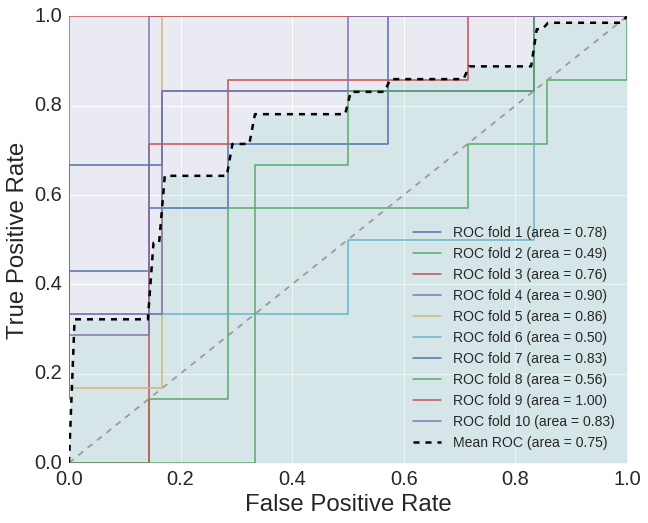

In [31]:
#use the best parameters to plot cv auc on the training set
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold
from scipy import interp

figsize(10,8)
cv = StratifiedKFold(trainlabel, n_folds=10)

bestmodel_training= svm.SVC(kernel=seed, C= C_best, gamma= gamma_best, probability=True, 
                            random_state = rad_stat)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (training, testing) in enumerate(cv):
    probas_ = bestmodel_training.fit(train_1[training], trainlabel[training]).predict_proba(train_1[testing])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(trainlabel[testing], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1.5, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', 
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2.5)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate',fontsize = 24)
plt.ylabel('True Positive Rate',fontsize = 24)
plt.xticks(fontsize = 20) 

plt.yticks(fontsize = 20) 

#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize = 14)

plt.fill_between(mean_fpr, 0, mean_tpr, #color="#348ABD", 
                 color="#66cdaa", alpha=0.15)
plt.show()

In [32]:
#predict the test set

tt=mysvc.test()
result = tt.test_classification(test_1, testlabel,bestmodel_training)

This is for test set**************************************
('The accuracy for the test set is 0.6875', 'and the confusion matrix is')
[[11  5]
 [ 5 11]]
             precision    recall  f1-score   support

        0.0       0.69      0.69      0.69        16
        1.0       0.69      0.69      0.69        16

avg / total       0.69      0.69      0.69        32



[[11  5]
 [ 5 11]]
*******************************************


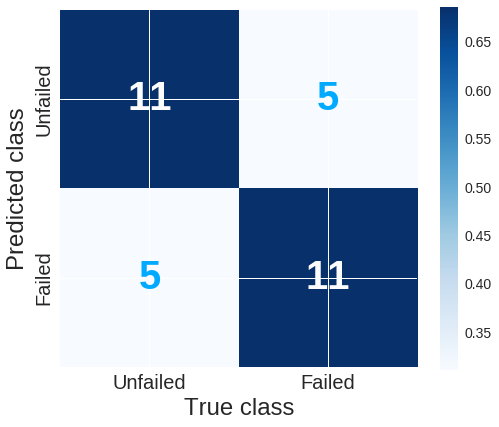

In [33]:
#plot the confusion matrix on test set
import Superplot
from sklearn.metrics.classification import accuracy_score, confusion_matrix, classification_report
print (confusion_matrix(result, testlabel))
pp = Superplot.fancy()
pp.plot_confusion_matrix(confusion_matrix(result, testlabel))

In [34]:
#plot the auc on test set
from sklearn.metrics import roc_curve, auc

y_score = bestmodel_training.predict_proba(test_1)
#print (y_score)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

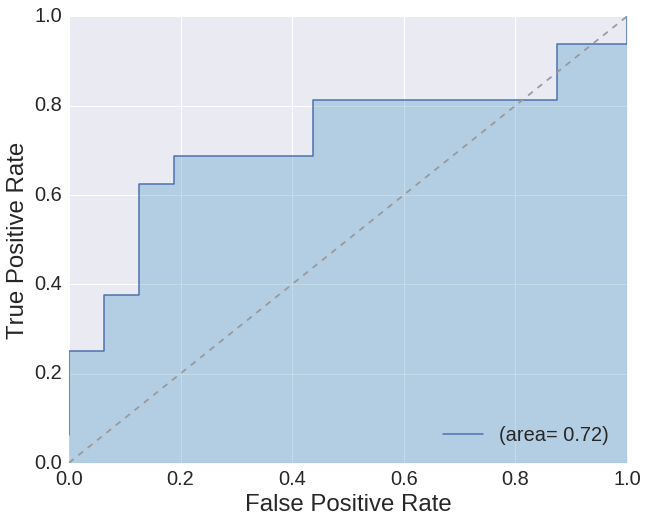

In [35]:
#plot the auc on test set
fpr, tpr, thresholds = roc_curve(testlabel, y_score[:, 1])
roc_auc = auc(fpr, tpr)

figsize(10,8)

plt.plot(fpr, tpr, lw=1.5, label='(area= %0.2f)' % ( roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
#plt.xlim([-0.05, 1.05])
#plt.ylim([-0.05, 1.05])

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate',fontsize = 24)
plt.ylabel('True Positive Rate',fontsize = 24)
plt.xticks(fontsize = 20) 

plt.yticks(fontsize = 20) 

#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize = 20)
sec = np.arange(0.0, 1.0, 0.05)
plt.fill_between(fpr, 0, tpr, color="#348ABD", alpha=0.3)
plt.show()